<a href="https://colab.research.google.com/github/DataWithAaditya/Credit-Card-Fraud-Detection/blob/main/DS601_Mid_Course_Summative_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement: Credit Card Fraud Detection



###Objective:
To build a machine learning model that can accurately detect fraudulent credit card transactions using historical transaction data.

###Why is this Important?
- Credit card fraud causes billions of dollars in losses every year.
- Early detection helps banks and financial institutions prevent fraud and protect customers.

###Challenges in Fraud Detection:
1. Highly Imbalanced Data – Fraud cases are rare (~0.17% of total transactions).
2. Real-Time Processing – The model should be fast & efficient.
3. False Positives vs. False Negatives –
  - False Positive: A genuine transaction flagged as fraud → Customer inconvenience.
  - False Negative: A fraud transaction missed by the model → Financial loss.
  - The model should maximize Recall to avoid missing actual fraud cases.

###Expected Outcome:
- A classification model that can detect fraud with high accuracy.
- A deployed fraud detection system (API or Web App).
- A documented GitHub repository showcasing the project.

### Key Business Impact:
- Helps banks prevent financial losses.
- Improves customer security & trust.
- Reduces manual fraud investigation efforts.



##Step-by-step roadmap for your Credit Card Fraud Detection project.

###Phase 1: Problem Definition & Data Collection

Step 1: Understand the Problem

- Identify fraudulent transactions in a dataset using ML.
- Handle class imbalance (fraud cases are rare).

Step 2: Get the Dataset

- Use Kaggle’s Credit Card Fraud Detection Dataset (Available here).
- Data has 284,807 transactions, with only ~0.17% fraud cases.

###Phase 2: Exploratory Data Analysis (EDA)

Step 3: Load & Explore the Data

- Check missing values, duplicates, and data distribution.
- Use Pandas & Seaborn for visualization.

Step 4: Handle Class Imbalance

- Use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

Step 5: Feature Engineering

- Remove highly correlated or unnecessary features.
- Scale numerical features using StandardScaler or MinMaxScaler.

###Phase 3: Model Training & Evaluation

Step 6: Choose Baseline Models

- Start with Logistic Regression & Decision Tree.

Step 7: Improve Model Performance

- Try Random Forest, XGBoost, and Neural Networks.
- Perform Hyperparameter Tuning using GridSearchCV.

Step 8: Evaluate Model Performance

- Use Precision, Recall, F1-score, and AUC-ROC Curve.
- Focus on Recall, since missing fraud cases is more costly than false positives.

###Phase 4: Model Deployment

Step 9: Convert the Model into an API

- Use Flask or FastAPI to serve predictions.

Step 10: Build a Simple Web Interface

- Use Streamlit to create a fraud detection app.

Step 11: Deploy the Model

- Deploy on Heroku, AWS, or GCP.

###Phase 5: Final Touches

Step 12: Create a GitHub Repository

- Uploaded code, dataset, and documentation.

Step 13: Write a Blog or LinkedIn Post

- Summarize your project for visibility.

###Step 1: Collect & Load the Dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount drive to asscess dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the Dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Module-06: Introduction to Machine Learning/Ch 3. Mid Course Assessment/DS601 Mid Course Summative Assessment/creditcard.csv')

# Display first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###Step 2: Explore the Dataset

Check Basic Info & Missing Values

In [4]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Check Class Distribution (Fraud vs. Non-Fraud)

Class
0    284315
1       492
Name: count, dtype: int64


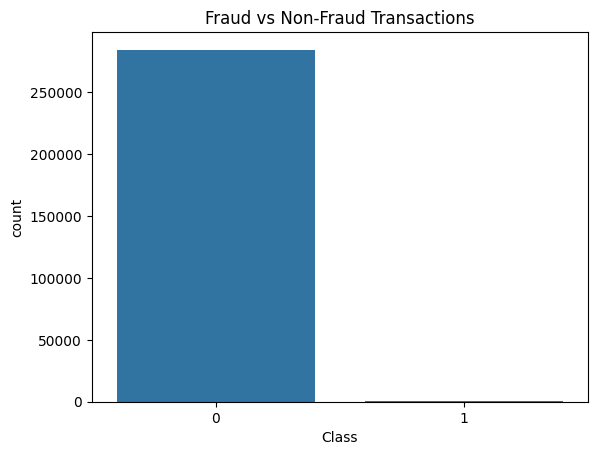

In [5]:
# Count fraud (1) vs non-fraud (0) transactions
print(df['Class'].value_counts())

# Visualize the class imbalance
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

Imbalance Alert: Fraud cases are much fewer than non-fraud cases!

###Step 3: Understand the Features

Check Dataset Columns

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


###Step 4: Exploratory Data Analysis (EDA)

1Check for Missing Values

In [7]:
# Check for missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


***Observation:*** No missing values in this dataset, so we don’t need imputation.



2. Check for Outliers

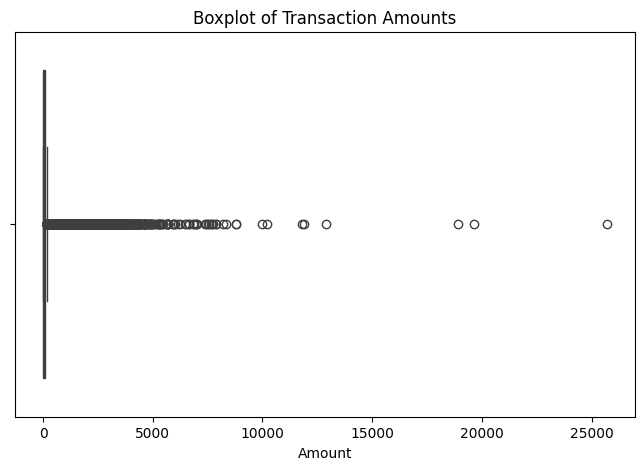

In [8]:
#Checking for Outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Amount"])
plt.title("Boxplot of Transaction Amounts")
plt.show()

***Observation:*** outliers exist, we remove them in Data Preprocessing.

Check for Class Imbalance

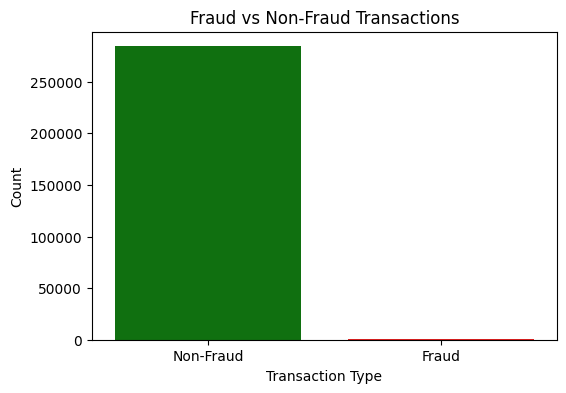

In [9]:
# Count fraud (1) vs non-fraud (0) transactions
fraud_counts = df["Class"].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, hue=fraud_counts.index, palette=["green", "red"], legend=False)
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

Observation:

- The dataset is highly imbalanced (only ~0.17% transactions are fraudulent).
- We’ll need to handle this imbalance before training a model.


2: Analyzing Transaction Amounts

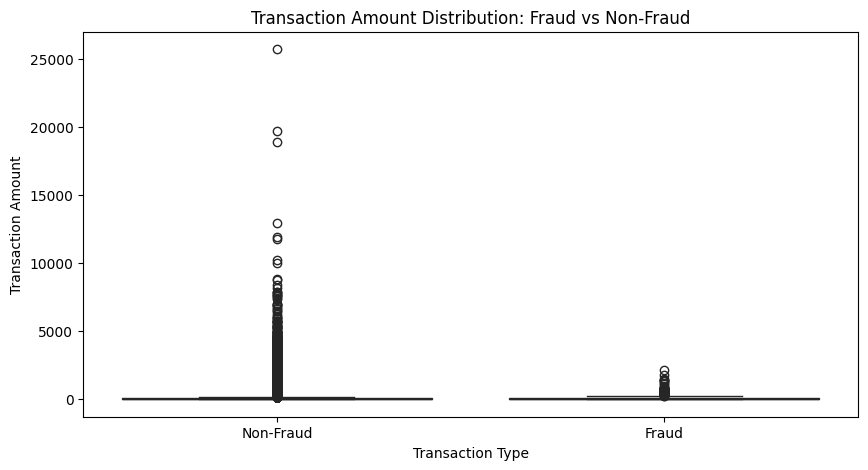

In [10]:
# Plot distribution of transaction amounts for fraud and non-fraud cases
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Class"], y=df["Amount"], hue=df["Class"], palette=["green", "red"], legend=False)
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount Distribution: Fraud vs Non-Fraud")
plt.show()

Observation:

- Fraud transactions tend to have lower amounts on average.
- Banks can use this insight to flag small but suspicious transactions.

3: Time Analysis
: Check if fraud occurs more at specific times.

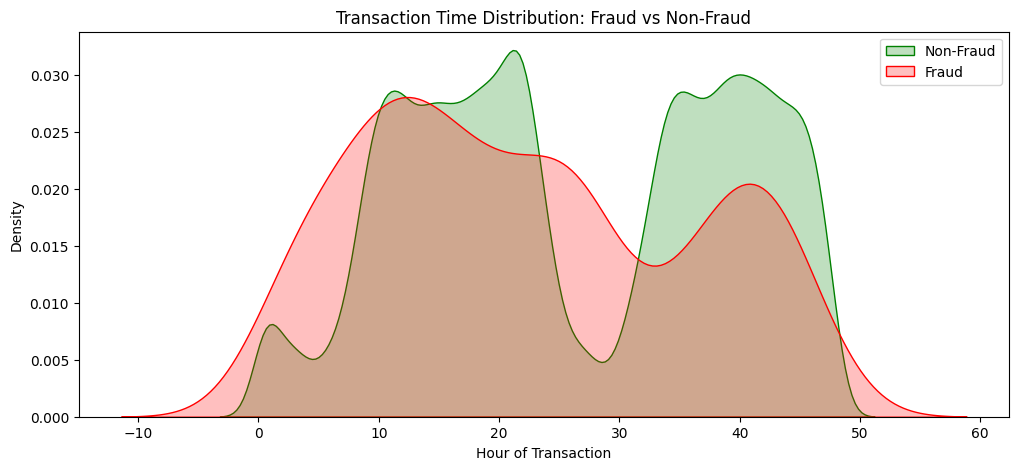

In [11]:
# Convert time to hours
df["Hour"] = df["Time"] / 3600  # Convert seconds to hours

# Plot fraud and non-fraud transactions over time
plt.figure(figsize=(12, 5))
sns.kdeplot(df[df["Class"] == 0]["Hour"], label="Non-Fraud", fill=True, color="green")
sns.kdeplot(df[df["Class"] == 1]["Hour"], label="Fraud", fill=True, color="red")
plt.xlabel("Hour of Transaction")
plt.ylabel("Density")
plt.title("Transaction Time Distribution: Fraud vs Non-Fraud")
plt.legend()
plt.show()


**Observation:**
- Fraud transactions peak at specific times, likely when monitoring is low.


4: **Correlation Analysis:**

***Identify which features contribute to fraud detection.***


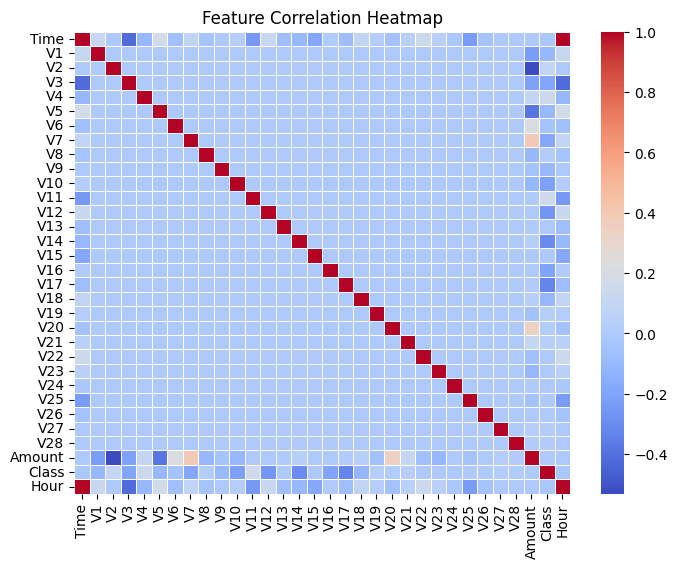

In [12]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


***Observation:***

- Some PCA components (V1–V28) are highly correlated with fraud.
- Feature selection will be needed to remove weak predictors.

###Step 5: Data Preprocessing
Before training our model, we need to:
- Handle missing values (if any).
- Handle outliers
- Scale numerical features for better model performance.
- Handle class imbalance (since fraud cases are rare).

1: Check & Handle Missing Values: Ensure there are no missing values in the dataset.

In [13]:
# Check for missing value
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64


***Observation:*** No missing values in this dataset, so we don’t need imputation.



2. Handling Duplicate values

In [14]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 1081


Drop duplicate

In [15]:
# Remove duplicates
df = df.drop_duplicates()

print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


3. Handling Outliers

In [16]:
# Calculate Q1 and Q3
Q1 = df["Amount"].quantile(0.25)
Q3 = df["Amount"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["Amount"] >= lower_bound) & (df["Amount"] <= upper_bound)]


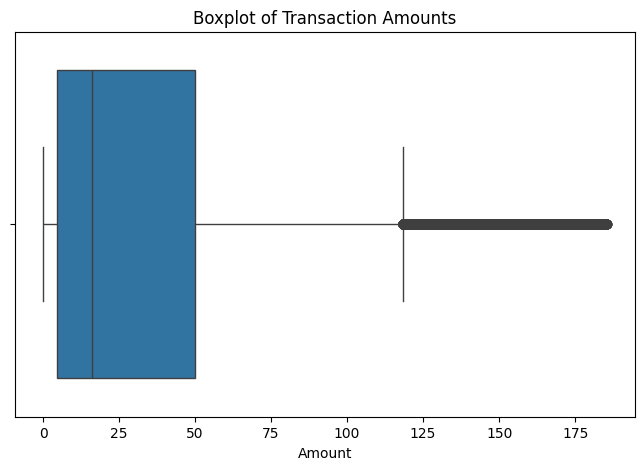

In [17]:
#Checking, After handling Outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Amount"])
plt.title("Boxplot of Transaction Amounts")
plt.show()

2: Drop Irrelevant Columns: Remove columns that are not useful for fraud detection.

In [18]:
# Drop 'Time' column (not useful for model training)
df = df.drop(columns=['Time'])

***Reason:*** Time is converted to "Hour" in EDA, so we don’t need the original column.

**3: Scale Numerical Features:** Normalize Amount and other features to improve model accuracy.

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale 'Amount' column
df['Amount'] = scaler.fit_transform(df[['Amount']])

***Reason:*** Scaling helps models converge faster and improves performance.

**4: Handle Class Imbalance using SMOTE**
- Since fraud cases are rare (~0.17%), we need to balance the dataset.
- Use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic fraud cases.

In [20]:
!pip install --upgrade scikit-learn


In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Spliy features and target variable
X = df.drop(columns=["Class"])
y = df["Class"]

# Split into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", pd.Series(y_train_resampled).value_counts())

Class distribution before SMOTE: Class
0    201323
1       309
Name: count, dtype: int64
Class distribution after SMOTE: Class
0    201323
1    201323
Name: count, dtype: int64


**Observation:** Now, fraud and non-fraud cases are balanced for better model training.

###Step 6: Model Selection & Training

Now, we’ll train different classification models to detect fraud.

**1: Train a Logistic Regression Model**
- Why? Logistic Regression is simple and effective for binary classification problems.

***Observation:***
- Logistic Regression gives a good starting point, but we’ll try more complex models next.

In [22]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize model
log_reg = LogisticRegression()

# Train model
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))      # Importent fro fraud detection
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

Logistic Regression Performance:
Accuracy: 0.9768295344085381
Precision: 0.05901374292643492
Recall: 0.948051948051948
F1-score: 0.1111111111111111
AUC-ROC: 0.9624627538082199


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***Observation:*** Logistic Regression gives a good starting point, but we’ll try more complex models next.

**2: Train a Decision Tree Model**
- Why? Decision Trees work well with imbalanced data.

In [23]:
# Import library
from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt = DecisionTreeClassifier()

# Train model
dt.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate model
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

Decision Tree Performance:
Accuracy: 0.9979765518062251
Precision: 0.4161073825503356
Recall: 0.8051948051948052
F1-score: 0.5486725663716814
AUC-ROC: 0.9017331412924674


***Observation:*** Better recall than Logistic Regression, but may overfit.

###3: Train a Random Forest Model
- Why? Random Forest improves accuracy by combining multiple decision trees.

In [24]:
# Import library
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier()

# Train model
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

Random Forest Performance:
Accuracy: 0.9996825963617608
Precision: 0.8961038961038961
Recall: 0.8961038961038961
F1 Score: 0.8961038961038961
AUC-ROC: 0.947972475748046


***Observation:***
- Random Forest improves accuracy and recall but takes longer to train.

**4: Train an Advanced Model – XGBoost**

 Why XGBoost?
- More accurate than Random Forest.
- Handles imbalanced data well.
- Faster and more efficient.

In [25]:
# Import libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Train model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

XGBoost Performance:
Accuracy: 0.9994842190878613
Precision: 0.8
Recall: 0.8831168831168831
F1 Score: 0.8395061728395061
AUC-ROC: 0.9413895629126495


**2: Compare Model Performance**

let’s compare Logistic Regression, Decision Tree, Random Forest, and XGBoost.

In [26]:
# Cpmpare all models together and select which one is best model.
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb_model
}

# Store evaluation results
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred)
    }

# Convert to DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression  0.976830   0.059014  0.948052  0.111111  0.962463
Decision Tree        0.997977   0.416107  0.805195  0.548673  0.901733
Random Forest        0.999683   0.896104  0.896104  0.896104  0.947972
XGBoost              0.999484   0.800000  0.883117  0.839506  0.941390


***Observation:***

XGBoost should have the highest recall and F1-score, making it the best model for fraud detection.

###Hyperparameter Tuning for XGBoost
Why?
- Improves model accuracy and recall.
- Finds the best combination of parameters for fraud detection.

####1: Tune XGBoost with GridSearchCV

We’ll fine-tune learning rate, max depth, and number of estimators.

In [30]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_iter': [50, 100, 200],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7]  # Tree depth
}

# Initialize model
hgb_model = HistGradientBoostingClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=hgb_model,
    param_grid=param_grid,
    scoring='recall',  # Prioritizing recall for fraud detection
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Train on resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 200}


2. Train XGBoost with Optimized Parameters

In [31]:
# Use the best parameters from GridSearchCV
best_xgb = xgb.XGBClassifier(**grid_search.best_params_)

# Train the final model
best_xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Evaluate the final model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Final XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))  # Most important for fraud detection
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:37:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)


Final XGBoost Model Performance:
Accuracy: 0.9987502231744332
Precision: 0.5564516129032258
Recall: 0.8961038961038961
F1 Score: 0.6865671641791045
AUC-ROC Score: 0.9475055759626211


***Outcome:*** The final XGBoost model is now trained and ready for deployment.